In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')

In [2]:
filepath = './customer_churn_dataset.csv'
df = pd.read_csv(filepath)
df

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.630000,53005.25,17,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.340000,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.160000,21027.00,22,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.270000,25239.56,6,567.660000,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,12-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.130000,24483.66,16,663.060000,No,Yes,Yes,Solved,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,6F51HFO,NaN,Basic Membership,21-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,...,-650.682758,27277.68,6,639.510000,No,Yes,Yes,No Information Available,No reason specified,1
36988,29,F,21KSM8Y,Town,Basic Membership,27-06-2016,No,xxxxxxxx,Without Offers,Smartphone,...,-638.123421,11069.71,28,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,1
36989,23,F,XK1IM9H,NaN,Basic Membership,11-09-2016,Yes,CID3838,Gift Vouchers/Coupons,Desktop,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,1
36990,53,M,K6VTP1Z,Village,Platinum Membership,15-06-2017,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,...,482.610000,2378.86,20,197.264414,Yes,Yes,No,Not Applicable,No reason specified,0


## **1. DATA PREPROCESSING**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

##### **I SEE THAT THE THE AVG_FREQUENCY_LOGIN_DAYS HAS NUMERIC NUMBERS WHICH ARE STORED AS TYPE OBJECT THIS WILL AFFECT DESCRIPTIVE STATISTICS, I FIX IT**

In [4]:
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

### **Handling nulls according to data type, to prevent errors** <br>
1. if nulls is 50% or greater we drop all the values else handle appropriately i.e. fill with mean, etc <br>
2. Only two numeric features have nulls, below 50% <br>

In [13]:
(df.select_dtypes(include=['int64', 'float64']).isnull().sum() / len(df)) * 100

age                         0.000000
days_since_last_login       0.000000
avg_time_spent              0.000000
avg_transaction_value       0.000000
avg_frequency_login_days    9.520978
points_in_wallet            9.307418
churn_risk_score            0.000000
dtype: float64

**Amputating the null numeric values**

In [6]:
df[['points_in_wallet', 'avg_frequency_login_days']] = df[['points_in_wallet', 'avg_frequency_login_days']].interpolate()
df.select_dtypes(include=['int64', 'float64']).isnull().sum()

age                         0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
avg_frequency_login_days    0
points_in_wallet            0
churn_risk_score            0
dtype: int64

**Now Handling Nulls of the Non-Numeric Features**

In [8]:
(df.select_dtypes(include=object).isnull().sum() / len(df)) * 100

gender                           0.000000
security_no                      0.000000
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral          0.000000
referral_id                      0.000000
preferred_offer_types            0.778547
medium_of_operation              0.000000
internet_option                  0.000000
last_visit_time                  0.000000
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
dtype: float64

**Amputating the Null Values For the Non-Numeric Values**

In [9]:
df[['region_category', 'preferred_offer_types']] = df[['region_category', 'preferred_offer_types']].fillna('unknown')
df.select_dtypes(include=object).isnull().sum()

gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

## **2. PERFORMING DESCRIPTIVE STATISTICS ON OUR DATASET**

**2.1. HERE'S WHAT WE CAN SEE ABOUT THE NUMERIC DATA**
1. Age:
  - the youngest customer is 10 years and the oldest is 64 years old
  - most customers are 51 years (75% of the customers)
  - age has no outliers i.e. indicated by low standard deviation
2. Days_since_last_login:
  - the large STD tells us that there are outliers in this column
  - we see that most of the most customers spend between 8 and 26 days logged-out of the site, this tells us that the min with a value of -999 is an outlier
3. Avg_time_spent:
  - we see that 75% of the customers spend 356s(about 6 minutes) logged in
  - we see the min spent_time is an outlier with a value of 2814(about 47 minutes)
4. avg_frequency_login_days:
  - we see that most customers spend between 10 and 22 times login into the site
4. Avg_transaction_value:
  - we see that most customers spend in the tens of thousands on average
  - the spending values don't show signs of outliers
5. Points_in_wallet:
  - also in the hundreds, showing signs of decent variability



In [11]:
df.select_dtypes(include=['int64', 'float64']).describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,15.993196,686.798521,0.540982
std,15.867412,228.819900,398.289149,19444.806226,8.988357,189.494949,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,10.000000,616.800000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,16.000000,696.632500,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,762.925000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


**2.2. HERE'S WHAT DESCRIPTIVE STATISTICS TELLS US ABOUT OUR CUSTOMER DEMOGRAPHICS**
- *NB: WE USE THIS TO UNDERSTAND HOW THEIR CHARACTER MIGHT AFFECT CHURNING*
1. we see that most of the customers are female
2. most of them stay in town
3. most of them have basic membership
4. they joined in 2015 in june, etc...

In [12]:
df.select_dtypes(include=object).drop(columns=['security_no', 'referral_id']).describe()

,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,3,4,6,1096,3,4,4,3,30101,2,2,2,5,9
top,F,Town,Basic Membership,02-06-2015,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,7:56:41,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,18490,14128,7724,55,15839,12349,13913,12413,6,20342,20440,18602,18602,6350


**A deeper dive into the categories of the non-numeric features** <br>
1. We see two features with a huge number of unique categories i.e. security_no has 36 992 values and joining_date  has 1096 <br>
2. These will cause dimensional explosing when we encode the data into numeric representation <br>
3. Special care will be taken

In [13]:
object_columns = df.select_dtypes(include=object).columns

print("======Each column has the following categories in string data====== \n")
for column in object_columns:
  unique_values = df[column].unique()
  print(f"{column} \n {unique_values}  \n num_of_categories = {len(unique_values)} \n")

======Each column has the following categories in string data====== 

gender 
 ['F' 'M' 'Unknown']  
 num_of_categories = 3 

security_no 
 ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']  
 num_of_categories = 36992 

region_category 
 ['Village' 'City' 'Town' 'unknown']  
 num_of_categories = 4 

membership_category 
 ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']  
 num_of_categories = 6 

joining_date 
 ['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']  
 num_of_categories = 1096 

joined_through_referral 
 ['No' '?' 'Yes']  
 num_of_categories = 3 

referral_id 
 ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']  
 num_of_categories = 11359 

preferred_offer_types 
 ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers'
 'unknown']  
 num_of_categories = 4 

medium_of_operation 
 ['?' 'Desktop' 'Smartphone' 'Both']  
 num_

## **3. DATA TRANSFORMATION - GENERATING NEW BETTER FEATURES FROM EXISTING FEATURES**

**3.1. TRANSFORMING NUMERICAL DATA**
  - After transforming feature A to feature B, we drop feature A
  - **why?**
  - because feature B is an identical representation of feature A but in another format
  - for example if we have a feature time_in_seconds we can create a new feature which better represents it. One motivation for this might be that because people understand time in minutes better than when it is in seconds
  - if we use both features after the transformation i.e.  feature A and feature B, this can the model to learn essentially the same thing
  - this can be a problem when we transform a dozen of features which could result in our models performance degradation

In [14]:
df.select_dtypes(include=['int64','float64']).head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,17.0,781.75,0
1,32,16,306.34,12838.38,10.0,641.22,0
2,44,14,516.16,21027.00,22.0,500.69,1
3,37,11,53.27,25239.56,6.0,567.66,1
4,31,20,113.13,24483.66,16.0,663.06,1


**3.1.1. First We Transform Age To Bins of Age Groups**

In [15]:
"""
    teen ==> 18 > age <=10
    young adults ==> age > 18 <=35
    middle adults ==> age > 35 and age < 55
    late adulthood ==> age > 55 and age < 65
"""

bins = [10,15, 18, 35, 55, 67]
labels = ['pre_teenagers', 'Teenagers', 'Young_Adults', 'Middle_Adults', 'Older_Adults']

df['age_groups'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
grouped = df.groupby('age_groups')
df = df.drop('age', axis=1)





In [17]:
df.head(3)

,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,age_groups
0,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0,Teenagers
1,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,12838.38,10.0,641.22,Yes,No,Yes,Solved,Quality Customer Care,0,Young_Adults
2,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1,Middle_Adults


In [18]:
# print("")
# print(grouped.size())

**3.1.2. Next We Transform days_since_last_login to activity status** <br>
NB: Binning days_since_last_visit, label example: -1-0 means recently active, 0-7 means active some_time_ago, etc

In [19]:
current_time = pd.Timestamp.now()
bins = [-1, 0, 7, 30, float('inf')]
labels = ['recent', 'some_time_ago', 'inactive', 'very_inactive']
df['activity_status'] = pd.cut(df['days_since_last_login'], bins=bins, labels=labels)
df = df.drop('days_since_last_login', axis=1)

**3.1.3. Next We Transform avg_time_spent from seconds to minutes** <br>

In [21]:
df['avg_time_spent_minutes'] = (df['avg_time_spent'] // 60).astype(int)
df = df.drop('avg_time_spent', axis=1)
df.head(3)

,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,age_groups,activity_status,avg_time_spent_minutes
0,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0,Teenagers,inactive,5
1,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,641.22,Yes,No,Yes,Solved,Quality Customer Care,0,Young_Adults,inactive,5
2,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1,Middle_Adults,inactive,8


**3.1.4. Next We Transform joining_date into a more meaningful feature numbers_of_years_since_member** <br>

In [22]:
current_time = pd.Timestamp.now()
df['joining_date'] = pd.to_datetime(df['joining_date'], errors='coerce')
df['number_of_years_since_member'] = ((current_time  - df['joining_date']).dt.days) // 365
df = df.drop('joining_date', axis=1)
df.head()

,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,age_groups,activity_status,avg_time_spent_minutes,number_of_years_since_member
0,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,...,Yes,Yes,No,Not Applicable,Products always in Stock,0,Teenagers,inactive,5,7
1,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,...,Yes,No,Yes,Solved,Quality Customer Care,0,Young_Adults,inactive,5,7
2,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,...,No,Yes,Yes,Solved in Follow-up,Poor Website,1,Middle_Adults,inactive,8,8
3,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,...,No,Yes,Yes,Unsolved,Poor Website,1,Middle_Adults,inactive,0,8
4,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,...,No,Yes,Yes,Solved,Poor Website,1,Young_Adults,inactive,1,7


**3.1.5. Next We Transform last_visit_time to time of day i.e. early morning, morning, midday, etc** <br>

In [23]:
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], errors='coerce')

def classify_time_of_day(time):
    if time is pd.NaT:
        return None
    hour = time.hour
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Midday'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['visit_time_of_day'] = df['last_visit_time'].apply(classify_time_of_day)
df = df.drop('last_visit_time', axis=1)
df.head(3)


,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,avg_transaction_value,...,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,age_groups,activity_status,avg_time_spent_minutes,number_of_years_since_member,visit_time_of_day
0,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,53005.25,...,Yes,No,Not Applicable,Products always in Stock,0,Teenagers,inactive,5,7,Midday
1,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12838.38,...,No,Yes,Solved,Quality Customer Care,0,Young_Adults,inactive,5,7,Midday
2,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,21027.00,...,Yes,Yes,Solved in Follow-up,Poor Website,1,Middle_Adults,inactive,8,8,Night


### **4. FEATURE ENGINEERING - WE DECIDE WHICH FEATURES SHOULD BE USED TO TRAIN OUR MODELS USING CORRELATION TESTS - WHY? GARBAGE-IN-GARBAGE-OUT**
1. Having too many features can slow down the performance of our models or add noise if some features are irrelevant to the task at hand
2. So we use statistical tests to check if there are two or more features (numeric or categorical) that represent the same information
3. If such features exists we can use one of them to train our model while dropping the others without loosing too much information
4. Since our dataset is mixed datatypes we use seperate correlation tests for each datatype group
  - We use pearson's crorreleation cofficient method for numerical features
  - we use ANOVA correlation cofficient method for categorical features



**4.1. TESTING CORRELATION BETWEEN NUMERICAL FEATURES**
  - we see that the numerical features have miniscule to no correlated features
  - this means they have little multilineality

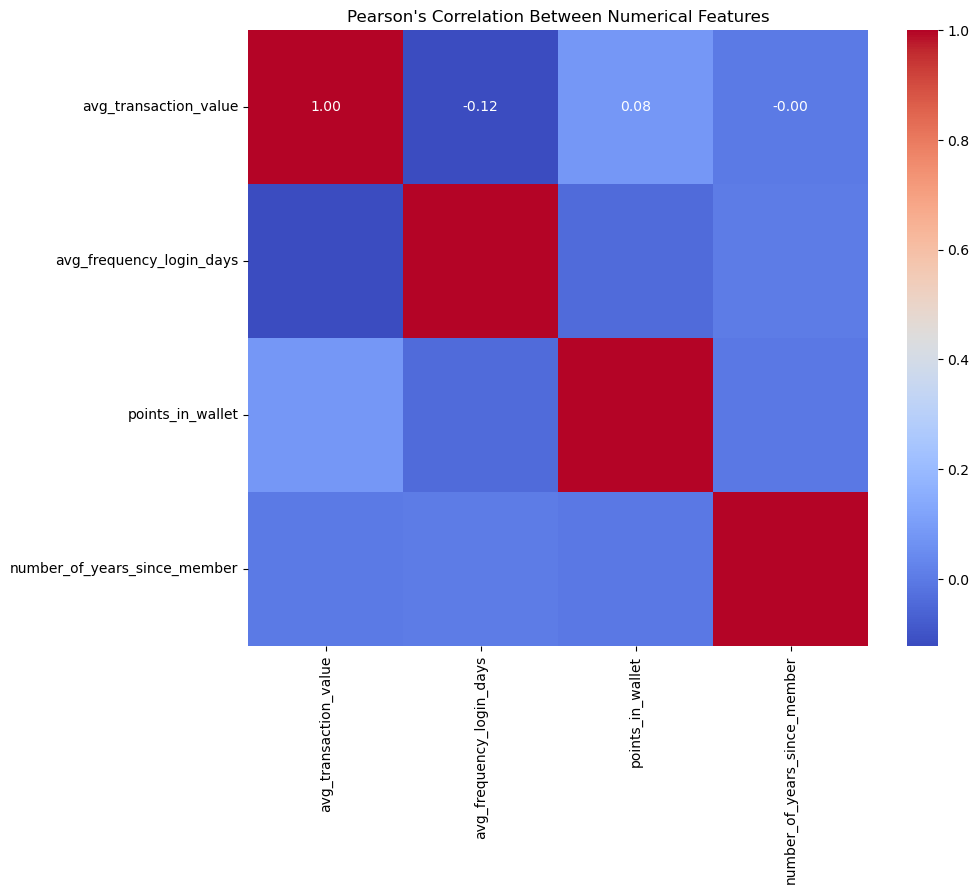

In [24]:
numeric_corr = df.select_dtypes(include=['int64', 'float64']).drop(columns=['churn_risk_score']).corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Pearson's Correlation Between Numerical Features")
plt.show()



**4.2. CORRELATION TESTS FOR CATEGORICAL FEATURES**
  - we tried to run tests on the whole dataset but it crashed the computer
  - we therefore **sample** from the dataset
  - -----RESULTS-----
  - we can see two two troublesome columns i.e. security_no and referral_id
  - we can see that most of the features have weak correlation except for three features pairs namely: (offer_application_preference and used_special_discount),(referal_id and joined_through_refferal), and (complain_status and past_complaint)
  - these features have high correlation scores of (0.81 and 0.91, and 1) respectively,  which indicates they may represent the same information i.e. duplicate features
  - we therefore investigate the relationship between them and choose which to drop and which to keep between the pair

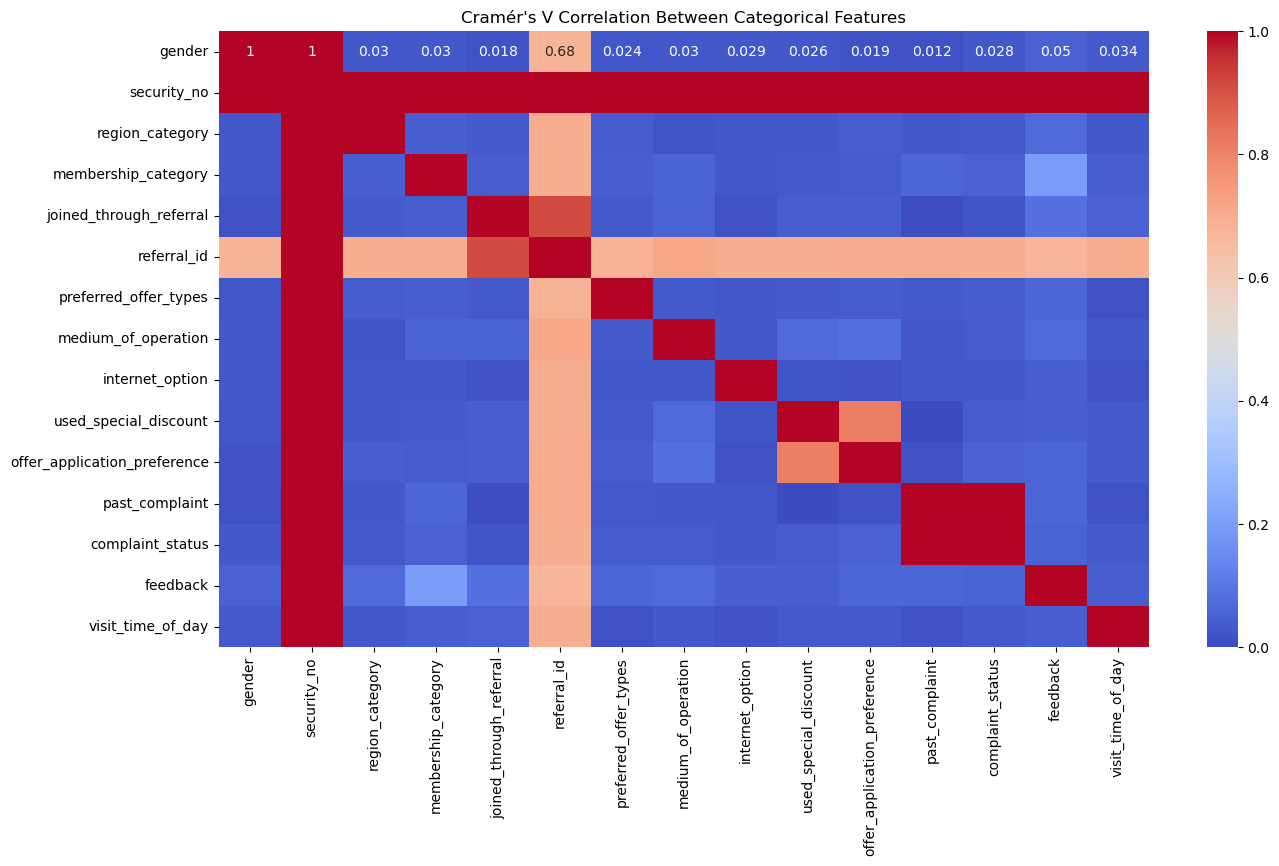

In [25]:
from scipy.stats import chi2_contingency

df_sample = df.sample(frac=0.1, random_state=42)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cat_columns = df_sample.select_dtypes(include=['object']).columns
cramers_results = pd.DataFrame(index=cat_columns, columns=cat_columns)

for col1 in cat_columns:
    for col2 in cat_columns:
        cramers_results.loc[col1, col2] = cramers_v(df_sample[col1], df_sample[col2])

cramers_results = cramers_results.astype(float)

plt.figure(figsize=(15, 8))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Between Categorical Features")
plt.show()


**4.2.1. FIRST WE INVESTIGATE THE TWO TROUBLESOME FEATURES NAMELY: SECURITY_NO AND REFERRAL_ID**
- we see that security_no is used to uniquely identify each customer but our model does not really need this informaton so we drop this feature because it could add noise to the data
- Given the size of our dataset, this can cause feature dimension explosion when we encode the data, which can affect model performance
- we see referral_id that referral_id has a high correlation with the joined_through_referral feature of 0.91. This tells us they are essentially the same thing. So, we can choose to drop one of them

- referral_id has a lot of unique values compared to the joined_through_referral feature. Given the size of our dataset, this can cause feature dimension explosion when we encode the data, which can affect model performance
- so we drop the referral_id feature and keep the joined_through_referral  

In [26]:
df['security_no'].head()

0    XW0DQ7H
1    5K0N3X1
2    1F2TCL3
3    VJGJ33N
4    SVZXCWB
Name: security_no, dtype: object

In [27]:
df['security_no'].describe()

count       36992
unique      36992
top       XW0DQ7H
freq            1
Name: security_no, dtype: object

In [28]:
df = df.drop('security_no', axis=1)
df.head(3)

,gender,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,avg_transaction_value,avg_frequency_login_days,...,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,age_groups,activity_status,avg_time_spent_minutes,number_of_years_since_member,visit_time_of_day
0,F,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,53005.25,17.0,...,Yes,No,Not Applicable,Products always in Stock,0,Teenagers,inactive,5,7,Midday
1,F,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12838.38,10.0,...,No,Yes,Solved,Quality Customer Care,0,Young_Adults,inactive,5,7,Midday
2,F,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,21027.00,22.0,...,Yes,Yes,Solved in Follow-up,Poor Website,1,Middle_Adults,inactive,8,8,Night


In [29]:
df[['joined_through_referral', 'referral_id']].head()

,joined_through_referral,referral_id
0,No,xxxxxxxx
1,?,CID21329
2,Yes,CID12313
3,Yes,CID3793
4,No,xxxxxxxx


In [30]:
df['referral_id'].describe()

count        36992
unique       11359
top       xxxxxxxx
freq         17846
Name: referral_id, dtype: object

In [31]:
df = df.drop('referral_id', axis=1)
df.head(3)

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,avg_transaction_value,avg_frequency_login_days,points_in_wallet,...,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,age_groups,activity_status,avg_time_spent_minutes,number_of_years_since_member,visit_time_of_day
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,53005.25,17.0,781.75,...,Yes,No,Not Applicable,Products always in Stock,0,Teenagers,inactive,5,7,Midday
1,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,12838.38,10.0,641.22,...,No,Yes,Solved,Quality Customer Care,0,Young_Adults,inactive,5,7,Midday
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,21027.00,22.0,500.69,...,Yes,Yes,Solved in Follow-up,Poor Website,1,Middle_Adults,inactive,8,8,Night


**4.2.2. NOW WE INVESTIGATE THE TWO HIGHLY CORRELATED FEATURES NAMELY:  OFFER_APPLICATION_PREFERENCE AND USED_SPECIAL_DISCOUNT**
  - a high correlation means the columns are essentially representing the same information, we have to drop one of them but which one?
  - what does offer_application_preference really represent? when we think about it, it does not seem to offer insights as to how a customer might churn
  - what about used_special_discount? well we could reason that certain customers who use special discount when making purchases are less likely to churn, so it seems like a strong feature compared to the offer_application_preference
  - we opt to drop the offer_application_preference

In [33]:
df[['offer_application_preference', 'used_special_discount']].head(10)

,offer_application_preference,used_special_discount
0,Yes,Yes
1,No,Yes
2,Yes,No
3,Yes,No
4,Yes,No
5,No,Yes
6,No,Yes
7,Yes,No
8,No,Yes
9,Yes,No


In [34]:
df = df.drop('offer_application_preference', axis=1)
df.head(3)

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,past_complaint,complaint_status,feedback,churn_risk_score,age_groups,activity_status,avg_time_spent_minutes,number_of_years_since_member,visit_time_of_day
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,53005.25,17.0,781.75,Yes,No,Not Applicable,Products always in Stock,0,Teenagers,inactive,5,7,Midday
1,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,12838.38,10.0,641.22,Yes,Yes,Solved,Quality Customer Care,0,Young_Adults,inactive,5,7,Midday
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,21027.00,22.0,500.69,No,Yes,Solved in Follow-up,Poor Website,1,Middle_Adults,inactive,8,8,Night


**4.2.3. NOW WE INVESTIGATE THE COMPLAINT_STATUS AND PAST_COMPLAINT FEATURES**
  - a high correlation score is indeed logical, because there there can't be a complaint_status if a customer hasn't complained in the past
  - however, this does not suggest they are duplicates because they clearly represent two different things
  - meaning we choose not to drop them because they both hold information that could be useful in calculating churn_risk_score


In [35]:
df[['complaint_status', 'past_complaint']].head()

,complaint_status,past_complaint
0,Not Applicable,No
1,Solved,Yes
2,Solved in Follow-up,Yes
3,Unsolved,Yes
4,Solved,Yes


### **5. PERFORMING DEEP EXPLORATORY ANALYSIS OF THE DATA**
  - now we ask serious questions about our customers to understand possible reasons of why they might have churned


**5.1. WHICH AGE GROUP CHURNED THE MOST?**
  - we see that young adults and middle adults churned the most
  - while teenagers churned the least

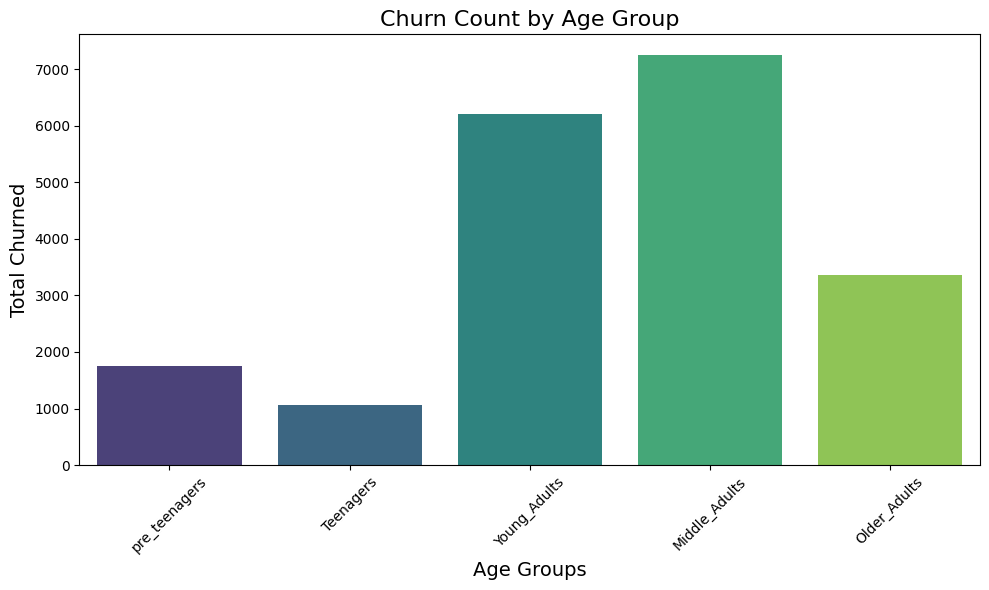

In [ ]:
churn_by_age_group = df.groupby('age_groups')['churn_risk_score'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_age_group.index, y=churn_by_age_group.values, palette='viridis')
plt.title('Churn Count by Age Group', fontsize=16)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Total Churned', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**5.2. WAS THERE A RELATIONSHIP BETWEEN GENDER AND CHURNING?**
  - there seems to be no clear relationship between gender and churning

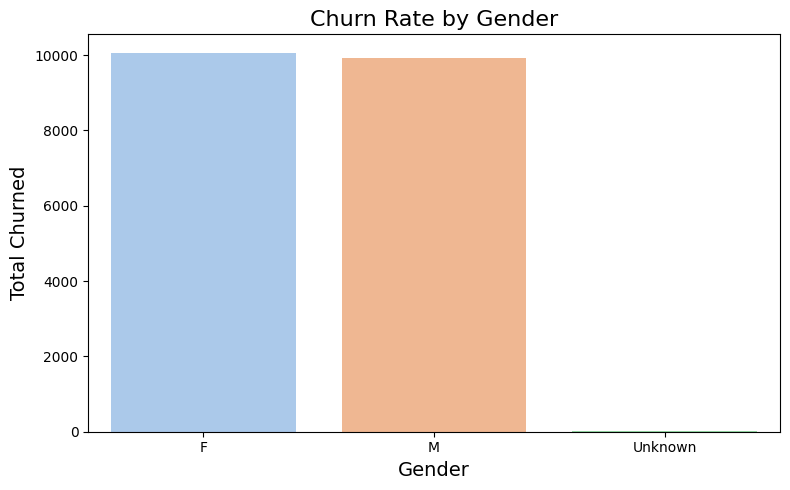

In [ ]:
churn_by_gender = df.groupby('gender')['churn_risk_score'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_gender.index, y=churn_by_gender.values, palette='pastel')
plt.title('Churn Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total Churned', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**5.3. WAS THERE A RELATIONSHIP BETWEEN THE REGION WHERE A CUSTOMER STAYS AND CHURNING?**
  - the plot show that customers who stay in town churned the most followed by those staying in the city
  - it also shows that customers staying in a village churned a lot less

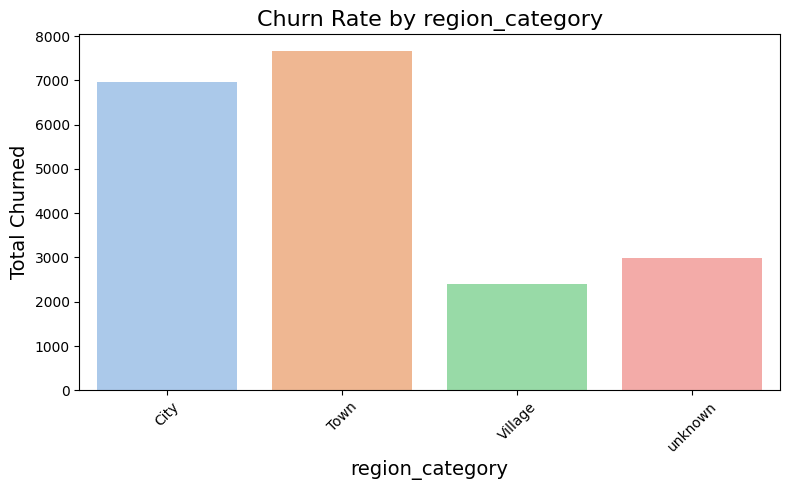

In [ ]:
churn_by_region = df.groupby('region_category')['churn_risk_score'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_region.index, y=churn_by_region.values, palette='pastel')
plt.title('Churn Rate by region_category', fontsize=16)
plt.xlabel('region_category', fontsize=14)
plt.ylabel('Total Churned', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 **5.4. WAS THERE A RELATIONSHIP BETWEEN CUSTOMER MEMEBERSHIP TYPE AND CHURNING?**
  - we see that customers with no membership and those with basic membership churned the most
  - followed by those of gold and silver membership
  - we also see that customers of platinum and premium membership have the least amount of churn

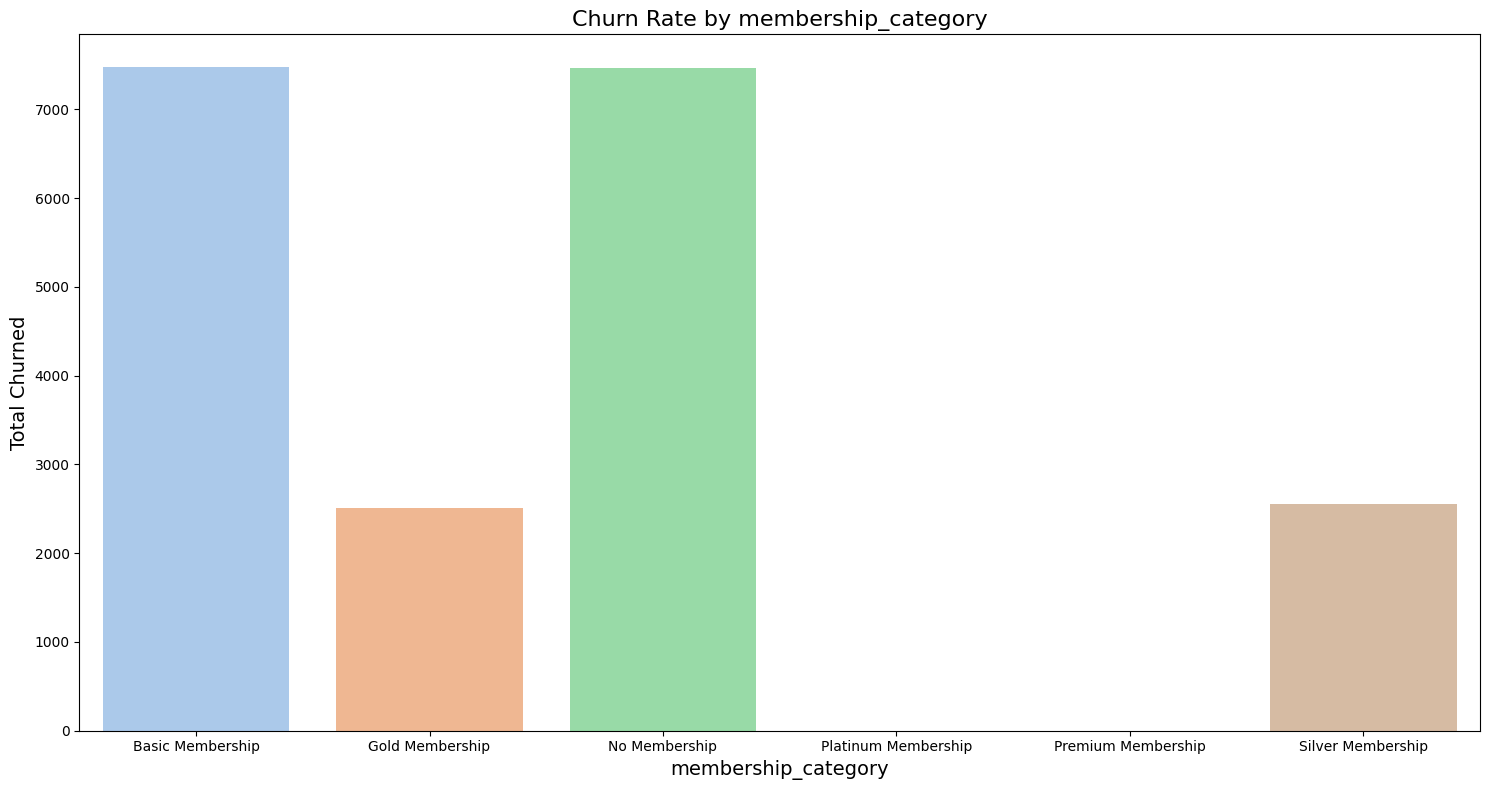

In [ ]:
churn_by_membership = df.groupby('membership_category')['churn_risk_score'].sum()

plt.figure(figsize=(15, 8))
sns.barplot(x=churn_by_membership.index, y=churn_by_membership.values, palette='pastel')
plt.title('Churn Rate by membership_category', fontsize=16)
plt.xlabel('membership_category', fontsize=14)
plt.ylabel('Total Churned', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**5.5. WAS THERE A RELATIONSHIP BETWEEN CUSTOMERS WHO JOINED THROUGH REFERAL AND THOSE WHO CHURNED**
  - there's inconclusive evidence that those who joined via referral churned most to those who did not

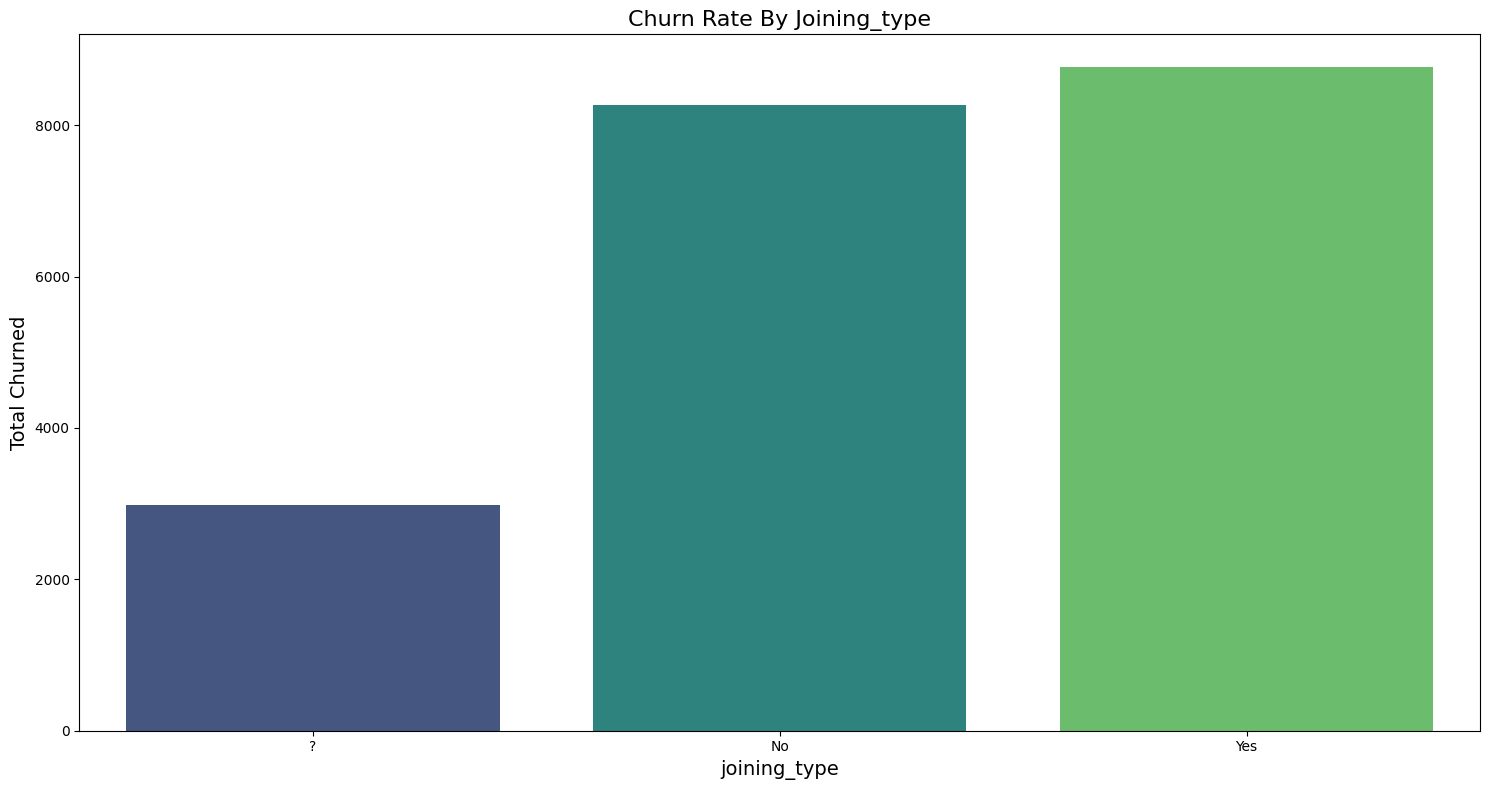

In [ ]:
churn_by_joining_type = df.groupby('joined_through_referral')['churn_risk_score'].sum()

plt.figure(figsize=(15, 8))
sns.barplot(x=churn_by_joining_type.index, y=churn_by_joining_type.values, palette='viridis')
plt.title('Churn Rate By Joining_type', fontsize=16)
plt.xlabel('joining_type', fontsize=14)
plt.ylabel('Total Churned', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**5.6. WAS THERE A RELATIONSHIP BETWEEN THE TYPE OF DEVICE A CUSTOMER USED TO ACCESS THE SITE AND THEM CHURNING?**
  - it shows that customers who used both desktop and smartphones to access the site churn considerably compared to those who only accessed the site using only one device

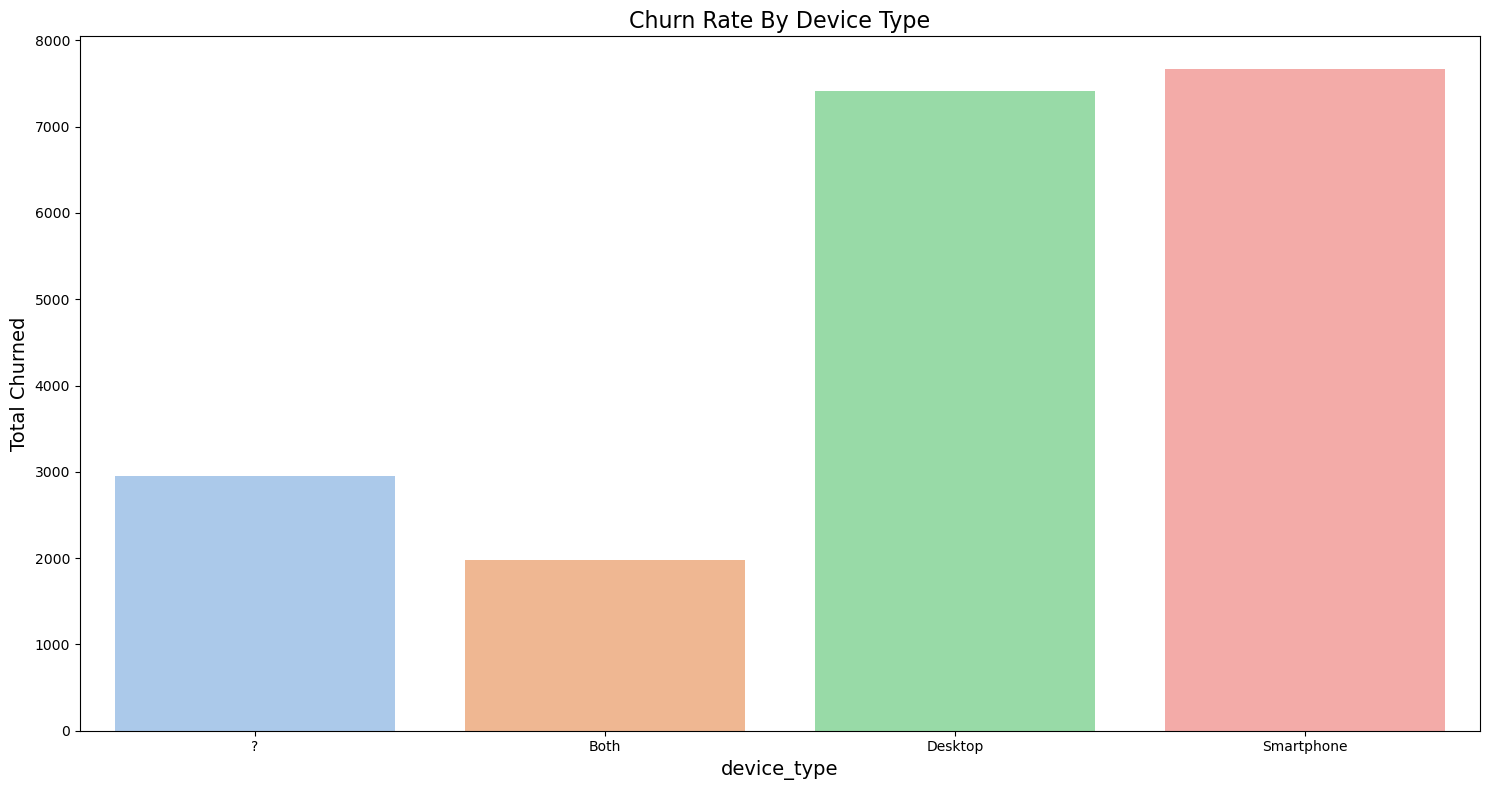

In [37]:
churn_by_device_type = df.groupby('medium_of_operation')['churn_risk_score'].sum()

plt.figure(figsize=(15, 8))
sns.barplot(x=churn_by_device_type.index, y=churn_by_device_type.values, palette='pastel')
plt.title('Churn Rate By Device Type', fontsize=16)
plt.xlabel('device_type', fontsize=14)
plt.ylabel('Total Churned', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**5.7. WAS THERE A RELATIONSHIP BETWEEN COMPLAINING AND CHURNING?**
   - it appears there is no conclusive relationship
   - customers with past complaints are equally likely to churn as those who have non

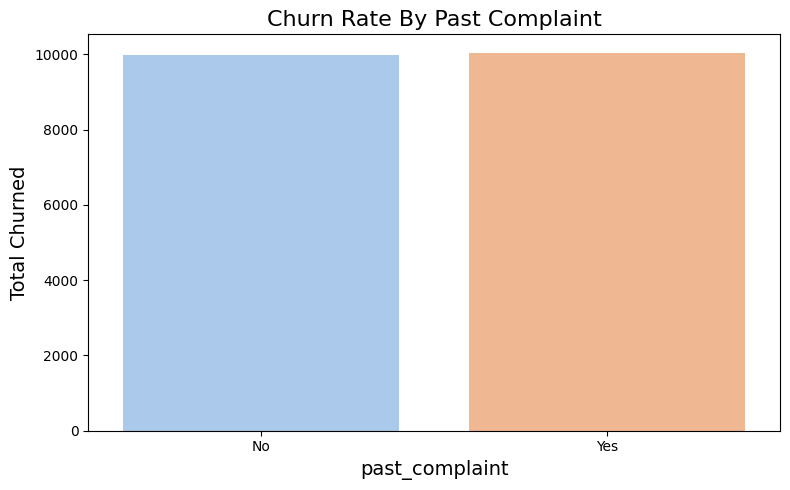

In [ ]:
# how many with past_complaint churned? Is what we are asking
churn_by_past_complaint = df.groupby('past_complaint')['churn_risk_score'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_past_complaint.index, y=churn_by_past_complaint.values, palette='pastel')
plt.title('Churn Rate By Past Complaint', fontsize=16)
plt.xlabel('past_complaint', fontsize=14)
plt.ylabel('Total Churned', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**5.8. WHAT DID MOST CUSTOMERS COMPLAINT ABOUT THAT LED TO THE MOST AMOUNT OF CHURNING?**
   - we see that most churned customers complained about poor customer service, quality products and a poor website and too many

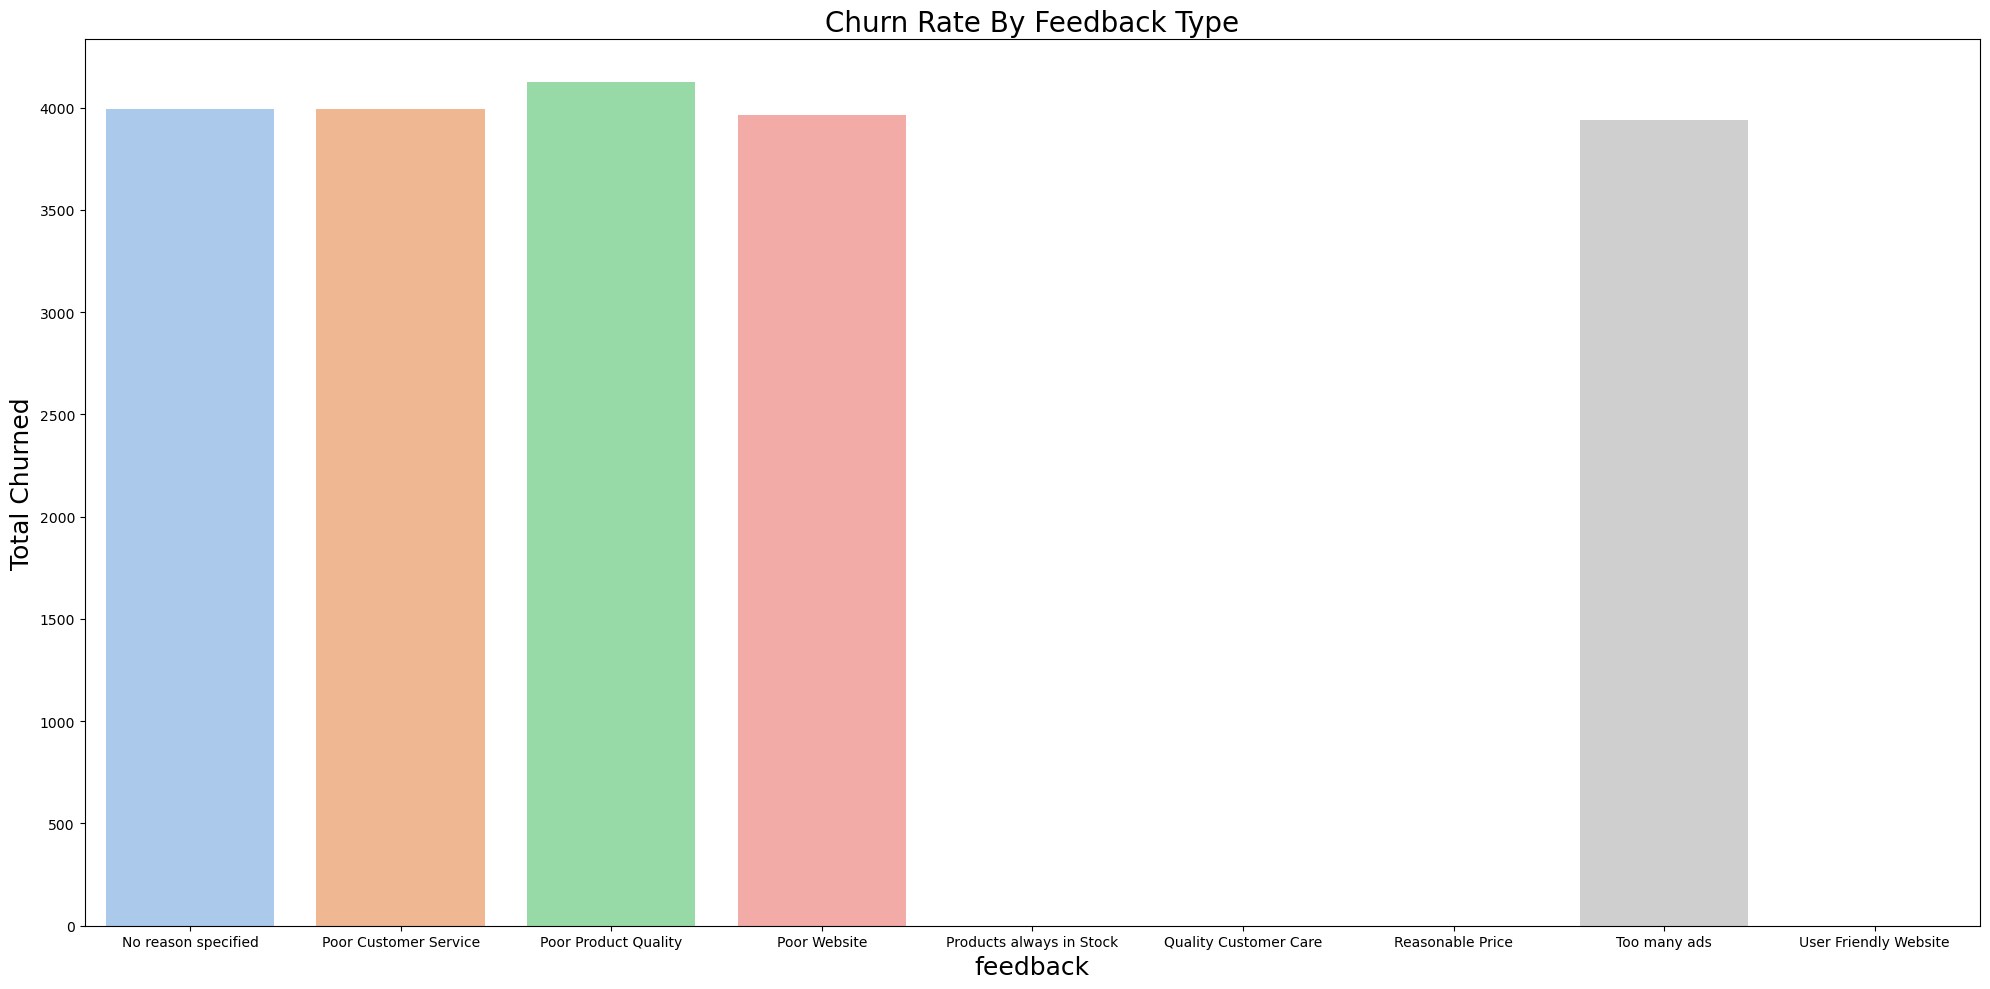

In [52]:
churn_by_feedback = df.groupby('feedback')['churn_risk_score'].sum()

plt.figure(figsize=(20, 10))
sns.barplot(x=churn_by_feedback.index, y=churn_by_feedback.values, palette='pastel')
plt.title('Churn Rate By Feedback Type', fontsize=20)
plt.xlabel('feedback', fontsize=18)
plt.ylabel('Total Churned', fontsize=18)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [44]:
df.head(3)

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,past_complaint,complaint_status,feedback,churn_risk_score,age_groups,activity_status,avg_time_spent_minutes,number_of_years_since_member,visit_time_of_day
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,53005.25,17.0,781.75,Yes,No,Not Applicable,Products always in Stock,0,Teenagers,inactive,5,7,Midday
1,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,12838.38,10.0,641.22,Yes,Yes,Solved,Quality Customer Care,0,Young_Adults,inactive,5,7,Midday
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,21027.00,22.0,500.69,No,Yes,Solved in Follow-up,Poor Website,1,Middle_Adults,inactive,8,8,Night


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   gender                        36992 non-null  object  
 1   region_category               36992 non-null  object  
 2   membership_category           36992 non-null  object  
 3   joined_through_referral       36992 non-null  object  
 4   preferred_offer_types         36992 non-null  object  
 5   medium_of_operation           36992 non-null  object  
 6   internet_option               36992 non-null  object  
 7   avg_transaction_value         36992 non-null  float64 
 8   avg_frequency_login_days      36992 non-null  float64 
 9   points_in_wallet              36992 non-null  float64 
 10  used_special_discount         36992 non-null  object  
 11  past_complaint                36992 non-null  object  
 12  complaint_status              36992 non-null  

**5.9. AN ANALYSIS OF BEHAVIORAL FEATURES OF EACH AGE GROUP**

**5.9.1. Which age group churned the most** <br>
1. We see that middle aged adults churned the most, followed by young adults <br>
2. Teenagers churned the least

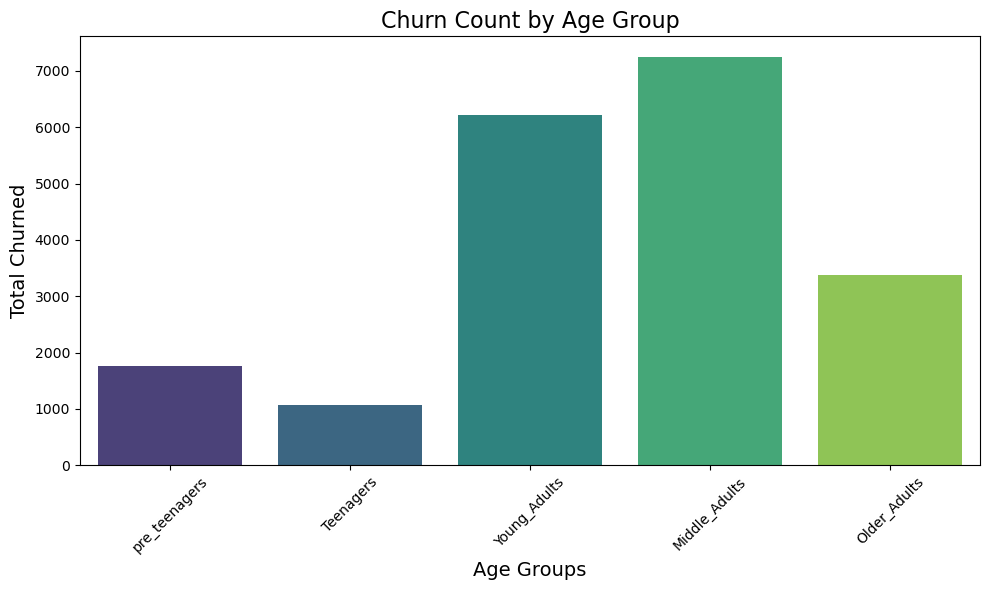

In [49]:
churn_by_age_group = df.groupby('age_groups')['churn_risk_score'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_age_group.index, y=churn_by_age_group.values, palette='viridis')
plt.title('Churn Count by Age Group', fontsize=16)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Total Churned', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
# create a pie chart where the slices represent complaint type and colors the age group

plt.figure(figsize=(20,15))
plt.pie()

TypeError: pie() missing 1 required positional argument: 'x'

<Figure size 2000x1500 with 0 Axes>

In [ ]:
# most common complaint by each age group?
most_common_complaint_by_age_group = df.groupby('age_groups')['feedback'].agg(lambda x: x.value_counts().idxmax())

# Display the results
print("Most common complaint by age group:")
print(most_common_complaint_by_age_group)


Most common complaint by age group:
age_groups
pre_teenagers             Too many ads
Teenagers        Poor Customer Service
Young_Adults              Too many ads
Middle_Adults     Poor Product Quality
Older_Adults              Poor Website
Name: feedback, dtype: object


**WE INVESTIGATE THE RELATIONSHIP BETWEEN WHICH CUSTOMERS WHO MADE PAST COMPLAINTS ACCORDING TO MEMBERSHIP TYPE, WHAT WAS THE MOST COMPLAINT THAT LED TO THE MOST CHURN, AND IF THEIR COMPLAINT WAS SOLVED, IF THIS LED TO MORE CHURNS**

In [ ]:
df['feedback'].describe()

,feedback
count,36992
unique,9
top,Poor Product Quality
freq,6350


In [ ]:
df = df[df['days_since_last_login'] >= 0 ]
df = df[df['avg_time_spent'] >= 0 ]
df.select_dtypes(include=['int64', 'float64']).describe()
df.head(3)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,641.22,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1


In [ ]:
# which complaint led to the most churn
churned_users = df[df['churn_risk_score'] == True]

# Group by complaint and count the occurrences
complaint_counts = churned_users['feedback'].value_counts()

# Identify the complaint that led to the most churn
most_common_churn_complaint = complaint_counts.idxmax()
most_common_churn_complaint_count = complaint_counts.max()

# Display the results
print(f"The complaint that led to the most churn is: '{most_common_churn_complaint}' with {most_common_churn_complaint_count} occurrences.")


The complaint that led to the most churn is: 'Poor Product Quality' with 4127 occurrences.


In [ ]:
# does a unresolved complains lead to churning?
unresolved_complaints = df[df['complaint_status'] == 'Unsolved']

churn_counts = unresolved_complaints['churn_risk_score'].value_counts()

proportion = churn_counts / churn_counts.sum()

print("Churn Counts for Unresolved Complaints:")
print(churn_counts)
print("\nProportion of Churned Users with Unresolved Complaints:")
print(proportion)

Churn Counts for Unresolved Complaints:
churn_risk_score
1    2491
0    2153
Name: count, dtype: int64

Proportion of Churned Users with Unresolved Complaints:
churn_risk_score
1    0.536391
0    0.463609
Name: count, dtype: float64


In [ ]:
df.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'age_groups'],
      dtype='object')

In [ ]:
df['internet_option'].unique()

array(['Wi-Fi', 'Mobile_Data', 'Fiber_Optic'], dtype=object)

In [ ]:
# which membership_category spends the most on average?
average_spending_by_membership = df.groupby('membership_category')['avg_transaction_value'].mean()

most_spending_membership = average_spending_by_membership.idxmax()
highest_average_spending = average_spending_by_membership.max()

print(f"The membership category that spends the most on average is: {most_spending_membership} with an average spending of {highest_average_spending:.2f}.")


The membership category that spends the most on average is: Premium Membership with an average spending of 35348.59.


In [ ]:
df['age'].describe()

,age
count,36992.000000
mean,37.118161
std,15.867412
min,10.000000
25%,23.000000
50%,37.000000
75%,51.000000
max,64.000000


In [ ]:
# most common complaint by each membership_category?
most_common_complaints = df.groupby('membership_category')['feedback'].agg(lambda x: x.mode().iloc[0])

print(most_common_complaints)


membership_category
Basic Membership        Poor Product Quality
Gold Membership         Poor Product Quality
No Membership            No reason specified
Platinum Membership             Too many ads
Premium Membership              Too many ads
Silver Membership      Poor Customer Service
Name: feedback, dtype: object


In [ ]:
df[['last_visit_time', 'days_since_last_login']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   last_visit_time        36992 non-null  object
 1   days_since_last_login  36992 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 578.1+ KB


In [ ]:
df.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joined_through_referral', 'referral_id',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'last_visit_time', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score',
       'age_groups', 'visit_time_of_day', 'visit_status',
       'number_of_years_since_joined'],
      dtype='object')

In [ ]:
# # initial drop of unnecessary columns
# # temporarily dropping last_visit_time will add to see if it has an effect

# df = df.drop(['security_no', 'referral_id', 'last_visit_time'], axis=1)
# df.head()

In [ ]:
# # feature and target variable selection
# X =df.drop('churn_risk_score', axis=1)
# y = df['churn_risk_score']

In [ ]:
################################################################################################
# the goal is to perform one-hot-encoding on the categorical columns and data transformation
# on other object non-categorical ones
# but first we must fix the errors inside them which can cause the process to fail
################################################################################################

In [ ]:
# saving the time to manually ask create plots
# cols_exclude = df.drop(['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'avg_time_spent_minutes'], axis=1)
# cols = cols_exclude.columns
# val_size = cols_exclude.nunique()

# for col in cols:
#   comparison_label = df.groupby(col)['churn_risk_score'].sum()
#   if (val_size[col] < 6):
#     plt.figure(figsize=(8, 5))
#     sns.barplot(x=comparison_label.index, y=comparison_label.values, palette='pastel')
#     plt.title(f'Churn Rate by {col}', fontsize=16)
#     plt.xlabel(f'{col}', fontsize=14)
#     plt.ylabel('Total Churned', fontsize=14)
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()
#     print(" \n")

#   else:
#     plt.figure(figsize=(15, 8))
#     sns.barplot(x=comparison_label.index, y=comparison_label.values, palette='pastel')
#     plt.title(f'Churn Rate by {col}', fontsize=16)
#     plt.xlabel(f'{col}', fontsize=14)
#     plt.ylabel('Total Churned', fontsize=14)
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

In [ ]:
# feature and target variable selection
X =df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f" \n X_train: {X_train.shape} \n X_test: {X_test.shape} \n y_train: {y_train.shape} \n y_test: {y_test.shape}")

 
 X_train: (26686, 22) 
 X_test: (6672, 22) 
 y_train: (26686,) 
 y_test: (6672,)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26686 entries, 11863 to 17549
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           26686 non-null  int64   
 1   gender                        26686 non-null  object  
 2   region_category               26686 non-null  object  
 3   membership_category           26686 non-null  object  
 4   joined_through_referral       26686 non-null  object  
 5   preferred_offer_types         26686 non-null  object  
 6   medium_of_operation           26686 non-null  object  
 7   internet_option               26686 non-null  object  
 8   days_since_last_login         26686 non-null  int64   
 9   avg_time_spent                26686 non-null  float64 
 10  avg_transaction_value         26686 non-null  float64 
 11  avg_frequency_login_days      26686 non-null  float64 
 12  points_in_wallet              26686 non-null  f

In [ ]:
# one-hot-encoding categorical columns so our data is all numerical

X_train_categorical_columns = X_train.select_dtypes(include=object).columns
X_train_numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

column_encoder = ColumnTransformer(
    transformers =  [
        ('num', 'passthrough', X_train_numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), X_train_categorical_columns)
    ]
)

# performing the ohe - resulting in a numpy array
encoded_X_train_columns = column_encoder.fit_transform(X_train)
encoded_X_test_columns = column_encoder.transform(X_test)

# we convert the resultant numpy array back into a pandas df so we can easily work with
encoded_X_train_df = pd.DataFrame(
    encoded_X_train_columns,
    columns=list(X_train_numerical_columns) + list(column_encoder.named_transformers_['cat'].get_feature_names_out(X_train_categorical_columns))
)

encoded_X_test_df = pd.DataFrame(
    encoded_X_test_columns,
    columns=list(X_train_numerical_columns) + list(column_encoder.named_transformers_['cat'].get_feature_names_out(X_train_categorical_columns))
)


In [ ]:
encoded_X_test_df.head(1)

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,number_of_years_since_joined,gender_F,gender_M,gender_Unknown,...,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,visit_time_of_day_Early Morning,visit_time_of_day_Evening,visit_time_of_day_Midday,visit_time_of_day_Morning,visit_time_of_day_Night
0,16.0,19.0,32.43,22432.64,23.0,1096.633216,9.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# now we standardize the data

scaler = StandardScaler()

# this also results in a numpy array which we must convert to a pandas df
X_train_scaled = scaler.fit_transform(encoded_X_train_df)
X_test_scaled = scaler.transform(encoded_X_test_df)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=encoded_X_train_df.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=encoded_X_test_df.columns)


In [ ]:
X_train_scaled_df

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,number_of_years_since_joined,gender_F,gender_M,gender_Unknown,...,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,visit_time_of_day_Early Morning,visit_time_of_day_Evening,visit_time_of_day_Midday,visit_time_of_day_Morning,visit_time_of_day_Night
0,0.810935,-0.855187,-0.445933,-0.796623,1.114998,0.374756,-0.840596,1.001425,-0.998278,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,-0.444818,-0.514936,1.723868,-0.379404
1,0.054687,1.118621,-0.706274,-0.143244,4.111208,-0.305576,-0.840596,1.001425,-0.998278,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,-0.444818,-0.514936,-0.580091,2.635715
2,1.315100,0.580309,-0.294118,0.039153,0.669032,-0.575235,-1.928584,-0.998577,1.001725,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,2.248109,-0.514936,-0.580091,-0.379404
3,-0.638541,-0.496313,-0.719369,-0.696063,0.446049,0.207407,-0.840596,1.001425,-0.998278,-0.039703,...,-0.199149,-0.193696,-0.199657,2.213609,-0.201577,-0.573687,2.248109,-0.514936,-0.580091,-0.379404
4,-0.260417,-0.496313,1.853635,0.131340,0.892015,-0.763980,-0.840596,-0.998577,1.001725,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,2.248109,-0.514936,-0.580091,-0.379404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,-1.394789,-0.675750,0.086429,0.603003,-0.780356,-0.330264,1.335380,1.001425,-0.998278,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,-0.444818,1.941989,-0.580091,-0.379404
26682,-1.016665,0.400872,-0.699982,3.556329,-1.672288,0.206239,-0.840596,-0.998577,1.001725,-0.039703,...,5.021369,-0.193696,-0.199657,-0.451751,-0.201577,1.743112,-0.444818,-0.514936,-0.580091,-0.379404
26683,0.936976,-0.137439,0.822687,-1.417912,1.226489,-0.230715,-0.840596,-0.998577,1.001725,-0.039703,...,-0.199149,-0.193696,-0.199657,2.213609,-0.201577,-0.573687,2.248109,-0.514936,-0.580091,-0.379404
26684,-0.071355,0.580309,1.747939,0.171081,0.334558,-0.047067,1.335380,1.001425,-0.998278,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,-0.444818,-0.514936,1.723868,-0.379404


In [ ]:
X_train_scaled_df.shape

(26686, 59)

In [ ]:
y_test.shape

(6672,)

In [ ]:
y_train.shape

(26686,)

In [ ]:
X_test_scaled_df.shape

(6672, 59)

In [ ]:
# we use cross-validation to build more robust models

# models to try out include:
# [random forests, bagging models, Gradient Boosting Machines boosting models like adaboost and gradientboost, xgboost
# logistic regression, Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA),  k-Nearest Neighbors (k-NN)
#

import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

start_time = time.time()

rf_model = RandomForestClassifier(random_state=42)
lg_model = LogisticRegression(random_state=0)
rf_model.fit(X_train_scaled_df, y_train)
y_pred = rf_model.predict(X_test_scaled_df)

# Optionally create a pipeline if you want to include preprocessing steps
pipeline = Pipeline([
    ('classifier', rf_model)
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train_scaled_df, y_train, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")
print(f"")
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Time taken to run the model: {elapsed_time:.2f} seconds")


Cross-validation scores: [0.93162233 0.92767472 0.92598838 0.93329586 0.92879895]
Mean CV score: 0.9294760493786599

Time taken to run the model: 24.68 seconds


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

start_time = time.time()

model = LogisticRegression(random_state=0)
lg_model = LogisticRegression(random_state=0)
lg_model.fit(X_train_scaled_df, y_train)
prediction = lg_model.predict(X_test_scaled_df)
acc = accuracy_score(y_test, prediction)
print("Logistic Regression model accuracy (in %):", acc*100)

model.fit(X_train_scaled_df, y_train)
prediction = model.predict(X_train_scaled_df)
print(f"\n Classification Report for {lg_model}:\n", classification_report(y_train, prediction))


Logistic Regression model accuracy (in %): 88.86390887290167

 Classification Report for LogisticRegression(random_state=0):
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     12335
           1       0.92      0.88      0.90     14351

    accuracy                           0.89     26686
   macro avg       0.89      0.90      0.89     26686
weighted avg       0.90      0.89      0.89     26686



In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=5, n_jobs=4)
# my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_model.fit(X_train_scaled_df, y_train,
             eval_set=[(X_test_scaled_df, y_test)],
             verbose=False)

y_pred = xgb_model.predict(X_test_scaled_df)

# Step 2: Display the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3029
           1       0.94      0.95      0.94      3643

    accuracy                           0.94      6672
   macro avg       0.94      0.94      0.94      6672
weighted avg       0.94      0.94      0.94      6672



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=200, learning_rate=1.0)
adb_model = adb.fit(X_train_scaled_df,y_train)
print("The accuracy of the model on validation set is", adb_model.score(X_test_scaled_df,y_test))

The accuracy of the model on validation set is 0.9276079136690647


In [ ]:
# import shap

# explainer = shap.TreeExplainer(rf_model)
# shap_values = explainer.shap_values(X_test_scaled_df)
# shap.summary_plot(shap_values, X_test_scaled_df)

In [ ]:
# import shap

# explainer = shap.TreeExplainer(rf_model)

# # Randomly sample from the test data (e.g., 1,000 rows)
# X_test_sample = X_test_scaled_df.sample(n=500, random_state=42)

# # Compute SHAP values on this smaller sample
# shap_values_sample = explainer.shap_values(X_test_sample)

# # Plot using the sampled data
# shap.summary_plot(shap_values_sample, X_test_sample)


In [ ]:
# explainer = shap.TreeExplainer(xgb_model)
# shap_values = explainer.shap_values(X_test_scaled_df)
# shap.summary_plot(shap_values, X_test_scaled_df)

In [ ]:
X_train_scaled_df

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,number_of_years_since_joined,gender_F,gender_M,gender_Unknown,...,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,visit_time_of_day_Early Morning,visit_time_of_day_Evening,visit_time_of_day_Midday,visit_time_of_day_Morning,visit_time_of_day_Night
0,0.810935,-0.855187,-0.445933,-0.796623,1.114998,0.374756,-0.840596,1.001425,-0.998278,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,-0.444818,-0.514936,1.723868,-0.379404
1,0.054687,1.118621,-0.706274,-0.143244,4.111208,-0.305576,-0.840596,1.001425,-0.998278,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,-0.444818,-0.514936,-0.580091,2.635715
2,1.315100,0.580309,-0.294118,0.039153,0.669032,-0.575235,-1.928584,-0.998577,1.001725,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,2.248109,-0.514936,-0.580091,-0.379404
3,-0.638541,-0.496313,-0.719369,-0.696063,0.446049,0.207407,-0.840596,1.001425,-0.998278,-0.039703,...,-0.199149,-0.193696,-0.199657,2.213609,-0.201577,-0.573687,2.248109,-0.514936,-0.580091,-0.379404
4,-0.260417,-0.496313,1.853635,0.131340,0.892015,-0.763980,-0.840596,-0.998577,1.001725,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,2.248109,-0.514936,-0.580091,-0.379404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,-1.394789,-0.675750,0.086429,0.603003,-0.780356,-0.330264,1.335380,1.001425,-0.998278,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,-0.444818,1.941989,-0.580091,-0.379404
26682,-1.016665,0.400872,-0.699982,3.556329,-1.672288,0.206239,-0.840596,-0.998577,1.001725,-0.039703,...,5.021369,-0.193696,-0.199657,-0.451751,-0.201577,1.743112,-0.444818,-0.514936,-0.580091,-0.379404
26683,0.936976,-0.137439,0.822687,-1.417912,1.226489,-0.230715,-0.840596,-0.998577,1.001725,-0.039703,...,-0.199149,-0.193696,-0.199657,2.213609,-0.201577,-0.573687,2.248109,-0.514936,-0.580091,-0.379404
26684,-0.071355,0.580309,1.747939,0.171081,0.334558,-0.047067,1.335380,1.001425,-0.998278,-0.039703,...,-0.199149,-0.193696,-0.199657,-0.451751,-0.201577,-0.573687,-0.444818,-0.514936,1.723868,-0.379404


In [ ]:
# from lime.lime_tabular import LimeTabularExplainer

# class_names = ['0', '1']
# feature_names = list(X_train_scaled_df.columns)
# X_train_scaled_np = X_train_scaled_df.values

# explainer = LimeTabularExplainer(X_train_scaled_np,
#                                  feature_names=feature_names,
#                                  class_names= class_names,
#                                  mode = 'classification')

# # Step 8: Choose a sample from the test set to explain (let's take the first one)
# # Choose a sample from the test set to explain
# sample_index = 0
# sample = X_test_scaled_df.iloc[sample_index].values.reshape(1, -1)  # Use .iloc to access the row

# # Generate explanation for the chosen sample
# # Ensure to pass the model's prediction method and flatten the sample
# exp = explainer.explain_instance(sample.flatten(),  # Flatten the sample to 1D
#                                  rf_model.predict_proba,
#                                  num_features=4)

# # Display the explanation
# exp.show_in_notebook(show_table=True, show_all=False)

# # Print the explanation in the console
# print(exp.as_list())

In [ ]:
y.unique()

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.metrics import classification_report, confusion_matrix

# # Assuming the target variable (churn label) is in a separate variable y_train_df and y_test_df
# # Let's say `y_train_df` and `y_test_df` contain the churn labels (binary: 0 or 1)

# # Build the neural network model
# model = Sequential()

# # Input layer (number of neurons = number of features in your dataset)
# model.add(Dense(128, input_dim=X_train_scaled_df.shape[1], activation='relu'))  # First hidden layer with 128 neurons
# model.add(Dense(64, activation='relu'))  # Second hidden layer with 64 neurons
# model.add(Dense(32, activation='relu'))  # Third hidden layer with 32 neurons
# model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification, hence sigmoid)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_scaled_df, y_train_df,
#                     validation_data=(X_test_scaled_df, y_test_df),
#                     epochs=20, batch_size=32, verbose=1)

# # Evaluate the model
# _, accuracy = model.evaluate(X_test_scaled_df, y_test_df)
# print(f'Accuracy: {accuracy * 100:.2f}%')

# # Predict on the test set
# y_pred = (model.predict(X_test_scaled_df) > 0.5).astype("int32")

# # Generate classification report and confusion matrix
# print(classification_report(y_test_df, y_pred))
# print(confusion_matrix(y_test_df, y_pred))